# Investigating the data for House Price Predictions

## Importing the data

In [68]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_colwidth', None)

In [3]:
file_name = "all_houses_for_sale.pickle"
current_directory = os.getcwd()
pickle_file = os.path.join(current_directory, file_name)

In [4]:
pickle_file

'C:\\Users\\psydp2\\OneDrive - The University of Nottingham\\Year 2\\Group Project\\GitHub\\uon-dsda-22-y2-group-project-team-1\\investigations\\all_houses_for_sale.pickle'

In [5]:
df = pd.read_pickle(pickle_file)

In [6]:
df

,property_id,description,price,beds,baths,branch,post code,property type
0,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat
1,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat
2,property_2100326650,"3 bedroom Mid Terrace House for sale, Basildon Road, London, SE2","£475,000",3,1,Abbey Wood,SE2,flat
3,property_2100325739,"3 bedroom Mid Terrace House for sale, Redbourne Drive, London, SE28","£450,000",3,3,Abbey Wood,SE28,flat
4,property_2100325532,"3 bedroom Mid Terrace House for sale, Bracondale Road, London, SE2","£425,000",3,1,Abbey Wood,SE2,flat
...,...,...,...,...,...,...,...,...
4097,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat
4098,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat
4099,property_2100251715,"2 bedroom Flat for sale, Ashfield Court, York, YO24","£220,000",2,1,York,YO24,flat
4100,property_2100321230,"2 bedroom Semi Detached House for sale, Woodside Avenue, York, North Yorkshire, YO31","£210,000",2,1,York,YO31,flat


In [7]:
df['city'] = df['description'].str.split(',').str[-2].str.strip()
df['street'] = df['description'].str.split(',').str[-3].str.strip()

In [8]:
df

,property_id,description,price,beds,baths,branch,post code,property type,city,street
0,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat,London,Greening Street
1,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat,London,Greening Street
2,property_2100326650,"3 bedroom Mid Terrace House for sale, Basildon Road, London, SE2","£475,000",3,1,Abbey Wood,SE2,flat,London,Basildon Road
3,property_2100325739,"3 bedroom Mid Terrace House for sale, Redbourne Drive, London, SE28","£450,000",3,3,Abbey Wood,SE28,flat,London,Redbourne Drive
4,property_2100325532,"3 bedroom Mid Terrace House for sale, Bracondale Road, London, SE2","£425,000",3,1,Abbey Wood,SE2,flat,London,Bracondale Road
...,...,...,...,...,...,...,...,...,...,...
4097,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat,York,Byland Avenue
4098,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat,York,Byland Avenue
4099,property_2100251715,"2 bedroom Flat for sale, Ashfield Court, York, YO24","£220,000",2,1,York,YO24,flat,York,Ashfield Court
4100,property_2100321230,"2 bedroom Semi Detached House for sale, Woodside Avenue, York, North Yorkshire, YO31","£210,000",2,1,York,YO31,flat,North Yorkshire,York


## Creating Lat Long Columns

In [9]:
#!pip install pgeocode

In [15]:
import pgeocode

In [16]:
geo = pgeocode.Nominatim("gb")
for i, row in df.iterrows():
    postcode = row['post code']
    location = geo.query_postal_code(postcode)
    latitude = location.latitude
    longitude = location.longitude

    df.at[i, 'latitude'] = latitude
    df.at[i, 'longitude'] = longitude

In [17]:
df

,property_id,description,price,beds,baths,branch,post code,property type,city,street,latitude,longitude
0,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat,London,Greening Street,51.48690,0.107500
1,property_2100301781,"3 bedroom End Terrace House for sale, Greening Street, London, SE2","£582,000",3,1,Abbey Wood,SE2,flat,London,Greening Street,51.48690,0.107500
2,property_2100326650,"3 bedroom Mid Terrace House for sale, Basildon Road, London, SE2","£475,000",3,1,Abbey Wood,SE2,flat,London,Basildon Road,51.48690,0.107500
3,property_2100325739,"3 bedroom Mid Terrace House for sale, Redbourne Drive, London, SE28","£450,000",3,3,Abbey Wood,SE28,flat,London,Redbourne Drive,51.50230,0.104500
4,property_2100325532,"3 bedroom Mid Terrace House for sale, Bracondale Road, London, SE2","£425,000",3,1,Abbey Wood,SE2,flat,London,Bracondale Road,51.48690,0.107500
...,...,...,...,...,...,...,...,...,...,...,...,...
4097,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat,York,Byland Avenue,53.95760,-1.082700
4098,property_2100253095,"3 bedroom End Terrace House for sale, Byland Avenue, York, YO31","£225,000",3,1,York,YO31,flat,York,Byland Avenue,53.95760,-1.082700
4099,property_2100251715,"2 bedroom Flat for sale, Ashfield Court, York, YO24","£220,000",2,1,York,YO24,flat,York,Ashfield Court,53.94600,-1.116900
4100,property_2100321230,"2 bedroom Semi Detached House for sale, Woodside Avenue, York, North Yorkshire, YO31","£210,000",2,1,York,YO31,flat,North Yorkshire,York,53.95760,-1.082700


## Visualisation of the data

## Removing Empty Values

In [23]:
def remove_rows_with_empty_values(dataframe):
    dataframe = dataframe.dropna()
    dataframe = dataframe.reset_index(drop=True)
    return dataframe

In [24]:
df = remove_rows_with_empty_values(df)

In [25]:
df.isna().sum()

property_id      0
description      0
price            0
beds             0
baths            0
branch           0
post code        0
property type    0
city             0
street           0
latitude         0
longitude        0
dtype: int64

## Removing Non-Integer Rows from Price

In [26]:
df['price'] = df['price'].str.replace('£', '').str.replace(',', '')

In [53]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df = df.dropna(subset=['price'])

In [54]:
df['price'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4095 entries, 0 to 4095
Series name: price
Non-Null Count  Dtype  
--------------  -----  
4095 non-null   float64
dtypes: float64(1)
memory usage: 64.0 KB


In [55]:
df['price'] = df['price'].astype(int)

C:\Users\local_psydp2\Temp\ipykernel_28676\2468783641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price'] = df['price'].astype(int)


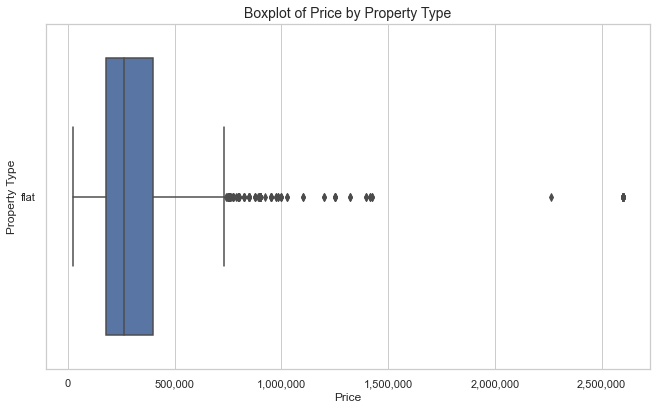

In [72]:
from matplotlib.ticker import FuncFormatter
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(12, 6))
sns.boxplot(data=df, y='property type', x='price', ax=ax, orient='h')
ax.set_xlabel('Price', fontsize=12)
ax.set_ylabel('Property Type', fontsize=12)
plt.title('Boxplot of Price by Property Type', fontsize=14)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)
plt.show()

## Bedrooms

In [73]:
df['beds'] = df['beds'].astype(int)

C:\Users\local_psydp2\Temp\ipykernel_28676\654496042.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['beds'] = df['beds'].astype(int)


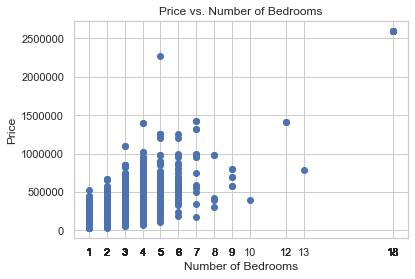

In [74]:
import matplotlib.pyplot as plt

sorted_df = df.sort_values('beds')
plt.scatter(sorted_df['beds'], sorted_df['price'])
plt.xlabel('Number of Bedrooms')
plt.ylabel('Price')
plt.title('Price vs. Number of Bedrooms')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(sorted_df['beds'].astype(int))

plt.show()

## Categorising Columns

In [35]:
column_to_remove = ['property_id','description','post code','street']
df_without_column = df.drop(column_to_remove, axis=1)

In [36]:
df_without_column

,price,beds,baths,branch,property type,city,latitude,longitude
0,582000,3,1,Abbey Wood,flat,London,51.48690,0.107500
1,582000,3,1,Abbey Wood,flat,London,51.48690,0.107500
2,475000,3,1,Abbey Wood,flat,London,51.48690,0.107500
3,450000,3,3,Abbey Wood,flat,London,51.50230,0.104500
4,425000,3,1,Abbey Wood,flat,London,51.48690,0.107500
...,...,...,...,...,...,...,...,...
4091,225000,3,1,York,flat,York,53.95760,-1.082700
4092,225000,3,1,York,flat,York,53.95760,-1.082700
4093,220000,2,1,York,flat,York,53.94600,-1.116900
4094,210000,2,1,York,flat,North Yorkshire,53.95760,-1.082700


In [37]:
branchid = {}
for idx, name in enumerate(df_without_column['branch'].unique()):
    branchid[name] = idx
df_without_column['BranchNumber'] = df_without_column['branch'].map(branchid)

In [38]:
property_type = {}
for idx, name in enumerate(df_without_column['property type'].unique()):
    property_type[name] = idx
df_without_column['PropertyTypeNumber'] = df_without_column['property type'].map(property_type)

In [39]:
city = {}
for idx, name in enumerate(df_without_column['city'].unique()):
    city[name] = idx
df_without_column['CityNumber'] = df_without_column['city'].map(city)

In [40]:
columns_to_remove = ['branch','property type','city']
df_without_column = df_without_column.drop(columns_to_remove, axis = 1)

In [41]:
df_without_column

,price,beds,baths,latitude,longitude,BranchNumber,PropertyTypeNumber,CityNumber
0,582000,3,1,51.48690,0.107500,0,0,0
1,582000,3,1,51.48690,0.107500,0,0,0
2,475000,3,1,51.48690,0.107500,0,0,0
3,450000,3,3,51.50230,0.104500,0,0,0
4,425000,3,1,51.48690,0.107500,0,0,0
...,...,...,...,...,...,...,...,...
4091,225000,3,1,53.95760,-1.082700,150,0,202
4092,225000,3,1,53.95760,-1.082700,150,0,202
4093,220000,2,1,53.94600,-1.116900,150,0,202
4094,210000,2,1,53.95760,-1.082700,150,0,79


## Correlations

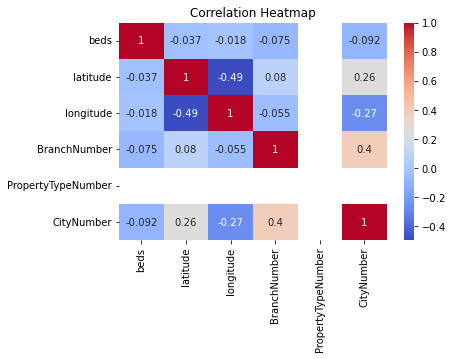

In [46]:
corr_matrix = df_without_column.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()